In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Eye_Data.csv')

In [ ]:
df.shape

(10314, 3)

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10314 non-null  object
 1   label    10314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.3+ KB


In [ ]:
df.head()

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [ ]:
#  old name - text, new - message
print(df.isnull().sum().to_frame().rename(columns={0:'Null values'}))

         Null values
message            0
label              0


In [ ]:
cnt = df['label'].value_counts()

*   1 - Not depressed
*   0 - Depressed

In [ ]:
cnt

0    8000
1    2314
Name: label, dtype: int64

<BarContainer object of 2 artists>

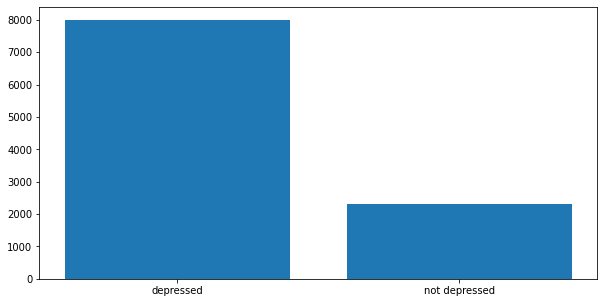

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.bar(['depressed', 'not depressed'], [cnt[0], cnt[1]])

UNDERSAMPLING

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X = df
print(X)
y = df['label']
print(y)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Check the new class distribution
print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_resampled))

                                                 message  label
0      just had a real good moment. i missssssssss hi...      0
1             is reading manga  http://plurk.com/p/mzp1e      0
2      @comeagainjen http://twitpic.com/2y2lx - http:...      0
3      @lapcat Need to send 'em to my accountant tomo...      0
4          ADD ME ON MYSPACE!!!  myspace.com/LookThunder      0
...                                                  ...    ...
10309  No Depression by G Herbo is my mood from now o...      1
10310  What do you do when depression succumbs the br...      1
10311  Ketamine Nasal Spray Shows Promise Against Dep...      1
10312  dont mistake a bad day with depression! everyo...      1
10313                                                  0      1

[10314 rows x 2 columns]
0        0
1        0
2        0
3        0
4        0
        ..
10309    1
10310    1
10311    1
10312    1
10313    1
Name: label, Length: 10314, dtype: int64
Original dataset shape: Counter({0: 8000, 1:

In [ ]:
# minor_class_len = len(df[df['label'] == 1])
# print(minor_class_len)

2314


In [ ]:
# major_class_indices = df[df['label'] == 0].index
# print(major_class_indices)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7990, 7991, 7992, 7993, 7994, 7995, 7996, 7997, 7998, 7999],
           dtype='int64', length=8000)


In [ ]:
# random_major_indices = np.random.choice(major_class_indices,
#                                         minor_class_len,
#                                         replace=False)
# print(len(random_major_indices))

2314


In [ ]:
# minor_class_indices = df[df['label'] == 1].index
# print(minor_class_indices)

Int64Index([ 8000,  8001,  8002,  8003,  8004,  8005,  8006,  8007,  8008,
             8009,
            ...
            10304, 10305, 10306, 10307, 10308, 10309, 10310, 10311, 10312,
            10313],
           dtype='int64', length=2314)


In [ ]:
# under_sample_indices = np.concatenate([minor_class_indices, random_major_indices])

In [ ]:
# under_sample_df = df.loc[under_sample_indices]

In [ ]:
X_resampled

,message,label
0,the oc http://mypict.me/1ord,0
1,getting my new car on monday yay me !!,0
2,@princess_narnia I heat! I want a full shoppi...,0
3,@macster7 this a relief! Hahah. Telling my gri...,0
4,Quick Question Is Fortune And Fame To Much To ...,0
...,...,...
4623,No Depression by G Herbo is my mood from now o...,1
4624,What do you do when depression succumbs the br...,1
4625,Ketamine Nasal Spray Shows Promise Against Dep...,1
4626,dont mistake a bad day with depression! everyo...,1


<AxesSubplot:xlabel='label', ylabel='count'>

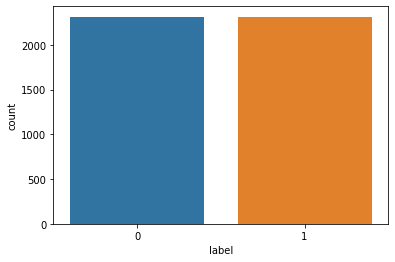

In [ ]:
sns.countplot(x='label', data=X_resampled)

In [ ]:
X_resampled.shape

(4628, 2)

In [ ]:
X_resampled.head()

,message,label
0,the oc http://mypict.me/1ord,0
1,getting my new car on monday yay me !!,0
2,@princess_narnia I heat! I want a full shoppi...,0
3,@macster7 this a relief! Hahah. Telling my gri...,0
4,Quick Question Is Fortune And Fame To Much To ...,0


In [ ]:
X_resampled['label'].value_counts()

0    2314
1    2314
Name: label, dtype: int64

In [ ]:
X_resampled.to_csv('Under_Sampled.csv', header=True, index=False)

END OF UNDERSAMPLING

over sampling starts

In [ ]:
X=df
print(X)
y=df['label']
print(y)

                                                 message  label
0      just had a real good moment. i missssssssss hi...      0
1             is reading manga  http://plurk.com/p/mzp1e      0
2      @comeagainjen http://twitpic.com/2y2lx - http:...      0
3      @lapcat Need to send 'em to my accountant tomo...      0
4          ADD ME ON MYSPACE!!!  myspace.com/LookThunder      0
...                                                  ...    ...
10309  No Depression by G Herbo is my mood from now o...      1
10310  What do you do when depression succumbs the br...      1
10311  Ketamine Nasal Spray Shows Promise Against Dep...      1
10312  dont mistake a bad day with depression! everyo...      1
10313                                                  0      1

[10314 rows x 2 columns]
0        0
1        0
2        0
3        0
4        0
        ..
10309    1
10310    1
10311    1
10312    1
10313    1
Name: label, Length: 10314, dtype: int64


In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# Assuming X and y are your feature matrix and target variable, respectively.
# Instantiate the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit the RandomOverSampler to your data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the new class distribution
print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_resampled))

Original dataset shape: Counter({0: 8000, 1: 2314})
Resampled dataset shape: Counter({0: 8000, 1: 8000})


In [ ]:
print(X_resampled)
print(y_resampled)

                                                 message  label
0      just had a real good moment. i missssssssss hi...      0
1             is reading manga  http://plurk.com/p/mzp1e      0
2      @comeagainjen http://twitpic.com/2y2lx - http:...      0
3      @lapcat Need to send 'em to my accountant tomo...      0
4          ADD ME ON MYSPACE!!!  myspace.com/LookThunder      0
...                                                  ...    ...
15995  Queen just cured my depression.  https://twitt...      1
15996  I've had depression/anxiety my entire life, I ...      1
15997  Yesterday, I struggled really badly with my de...      1
15998  Recognizing the signs of depression when someo...      1
15999  @matthaig Started reading Reasons to be alive ...      1

[16000 rows x 2 columns]
0        0
1        0
2        0
3        0
4        0
        ..
15995    1
15996    1
15997    1
15998    1
15999    1
Name: label, Length: 16000, dtype: int64


In [ ]:
X_resampled.to_csv('eye_over_Sampled.csv', header=True, index=False)

In [ ]:
#under sampling code by chatgpt

# from collections import Counter
# from imblearn.under_sampling import RandomUnderSampler

# # Assuming X and y are your feature matrix and target variable, respectively.
# # Instantiate the RandomUnderSampler
# rus = RandomUnderSampler(random_state=42)

# # Fit the RandomUnderSampler to your data
# X_resampled, y_resampled = rus.fit_resample(X, y)

# # Check the new class distribution
# print('Original dataset shape:', Counter(y))
# print('Resampled dataset shape:', Counter(y_resampled))
